# Assignment 12 - Neural Networks image recognition
Use both MLNN and the ConvNet to solve the following problem.

1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image. 


In [3]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as  plt
%matplotlib inline

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [8]:
# training noise 
mu, sigma = 0, 0.1 
noise_x_train = np.random.normal(mu, sigma, [60000, 28, 28]) 

In [9]:
# testing noise 
noise_x_test = np.random.normal(mu, sigma, [10000, 28, 28]) 

In [9]:
xx_train = x_train + noise_x_train
xx_test = x_test + noise_x_test

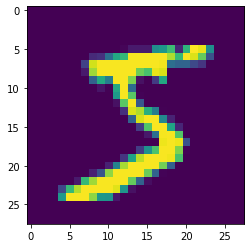

In [10]:
plt.imshow(x_train[0])

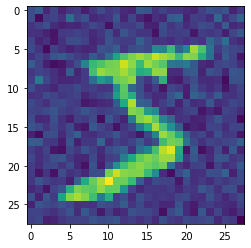

In [11]:
plt.imshow(xx_train[0])

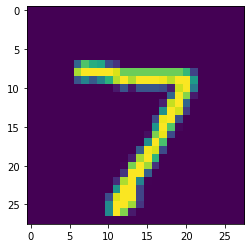

In [12]:
plt.imshow(x_test[0])

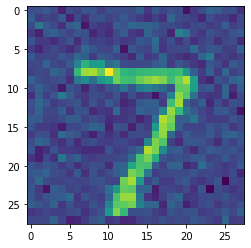

In [13]:
plt.imshow(xx_test[0])

2. Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 

In [14]:
x_train_NN = x_train.reshape(60000, 784)
x_test_NN = x_test.reshape(10000, 784)

In [7]:
batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
## NN without noise

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_NN, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_NN, y_test))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________________________

In [17]:
#NN no noise test
score = model.evaluate(x_test_NN, y_test, verbose=0)
score

[0.13750293925282298, 0.9821]

In [18]:
#NN no noise train
score_train = model.evaluate(x_train_NN, y_train, verbose=0)
score_train

[0.0025871739571745015, 0.99906665]

In [19]:
xx_train_NN = xx_train.reshape(60000, 784)
xx_test_NN = xx_test.reshape(10000, 784)

In [20]:
## NN with noise

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(xx_train_NN, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(xx_test_NN, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 54s 90

In [21]:
#NN noise test
score1 = model.evaluate(xx_test_NN, y_test, verbose=0)
score1

[0.2316132221521425, 0.9777]

In [22]:
#NN noise train
score1_train = model.evaluate(xx_train_NN, y_train, verbose=0)
score1_train

[0.0005200502355462094, 0.99976665]

In [23]:
## convolution NN

# input image dimensions
img_rows, img_cols = 28, 28

if backend.image_data_format() == 'channels_first':
    x_train_CNN = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test_CNN = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_CNN = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test_CNN = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [24]:
## CNN without noise

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_CNN, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_CNN, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 759s 13ms/sample - loss: 2.2854 - acc: 0.1491 - val_loss: 2.2484 - val_acc: 0.3847
Epoch 2/20
60000/60000 [==============================] - 748s 12ms/sample - loss: 2.2244 - acc: 0.2844 - val_loss: 2.1716 - val_acc: 0.6114
Epoch 3/20
60000/60000 [==============================] - 691s 12ms/sample - loss: 2.1456 - acc: 0.3957 - val_loss: 2.0704 - val_acc: 0.6746
Epoch 4/20
60000/60000 [==============================] - 728s 12ms/sample - loss: 2.0396 - acc: 0.4730 - val_loss: 1.9364 - val_acc: 0.7101
Epoch 5/20
60000/60000 [==============================] - 787s 13ms/sample - loss: 1.9025 - acc: 0.5311 - val_loss: 1.7638 - val_acc: 0.7340
Epoch 6/20
60000/60000 [==============================] - 693s 12ms/sample - loss: 1.7355 - acc: 0.5785 - val_loss: 1.5592 - val_acc: 0.7559
Epoch 7/20
60000/60000 [==============================] - 685s 11ms/sample - loss: 1.5605 - acc: 0.6109 

In [25]:
#CNN no noise test
score2 = model.evaluate(x_test_CNN, y_test, verbose=0)
score2

[0.4511451195478439, 0.8839]

In [26]:
#CNN no noise train
score2_train = model.evaluate(x_train_CNN, y_train, verbose=0)
score2_train

[0.47080666828155515, 0.8749167]

In [27]:
if backend.image_data_format() == 'channels_first':
    xx_train_CNN = xx_train.reshape(xx_train.shape[0], 1, img_rows, img_cols)
    xx_test_CNN = xx_test.reshape(xx_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    xx_train_CNN = xx_train.reshape(xx_train.shape[0], img_rows, img_cols, 1)
    xx_test_CNN = xx_test.reshape(xx_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [28]:
# CNN with noise

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(xx_train_CNN, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xx_test_CNN, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 797s 13ms/sample - loss: 2.2961 - acc: 0.1147 - val_loss: 2.2695 - val_acc: 0.2072
Epoch 2/20
60000/60000 [==============================] - 709s 12ms/sample - loss: 2.2584 - acc: 0.1899 - val_loss: 2.2272 - val_acc: 0.3663
Epoch 3/20
60000/60000 [==============================] - 724s 12ms/sample - loss: 2.2158 - acc: 0.2602 - val_loss: 2.1747 - val_acc: 0.4718
Epoch 4/20
60000/60000 [==============================] - 790s 13ms/sample - loss: 2.1606 - acc: 0.3322 - val_loss: 2.1033 - val_acc: 0.5467
Epoch 5/20
60000/60000 [==============================] - 760s 13ms/sample - loss: 2.0841 - acc: 0.3974 - val_loss: 2.0054 - val_acc: 0.6155
Epoch 6/20
60000/60000 [==============================] - 753s 13ms/sample - loss: 1.9834 - acc: 0.4552 - val_loss: 1.8766 - val_acc: 0.6687
Epoch 7/20
60000/60000 [==============================] - 720s 12ms/sample - loss: 1.8573 - acc: 0.5061 

In [29]:
#CNN noise test
score3 = model.evaluate(xx_test_CNN, y_test, verbose=0)
score3

[0.5528860177993774, 0.8635]

In [30]:
#CNN noise train
score3_train = model.evaluate(xx_train_CNN, y_train, verbose=0)
score3_train

[0.5728841085275014, 0.8552833]

3. Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

In [10]:
# 2x noise 
noise_xx_train = noise_x_train*2
noise_xx_test = noise_x_test*2

In [11]:
xxx_train = x_train + noise_xx_train
xxx_test = x_test + noise_xx_test

In [12]:
xxx_train_NN = xxx_train.reshape(60000, 784)
xxx_test_NN = xxx_test.reshape(10000, 784)

In [59]:
## NN with 2x noise

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(xxx_train_NN, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(xxx_test_NN, y_test))


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 47s 77

In [60]:
#NN 2x noise test
score4 = model.evaluate(xxx_test_NN, y_test, verbose=0)
score4

[0.32975669070233327, 0.9676]

In [61]:
#NN 2x noise train
score4_train = model.evaluate(xxx_train_NN, y_train, verbose=0)
score4_train

[0.0011462108011735788, 0.9996333]

In [13]:
## convolution NN 2x noise

# input image dimensions
img_rows, img_cols = 28, 28

if backend.image_data_format() == 'channels_first':
    xxx_train_CNN = xxx_train.reshape(xxx_train.shape[0], 1, img_rows, img_cols)
    xxx_test_CNN = xxx_test.reshape(xxx_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    xxx_train_CNN = xxx_train.reshape(xxx_train.shape[0], img_rows, img_cols, 1)
    xxx_test_CNN = xxx_test.reshape(xxx_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [14]:
# CNN with noise

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(xxx_train_CNN, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xxx_test_CNN, y_test))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 790s 13ms/sample - loss: 2.2946 - acc: 0.1185 - val_loss: 2.2675 - val_acc: 0.2019
Epoch 2/20
60000/60000 [==============================] - 793s 13ms/sample - loss: 2.2540 - acc: 0.1935 - val_loss: 2.2175 - val_acc: 0.4035
Epoch 3/20
60000/60000 [==============================] - 647s 11ms/sample - loss: 2.2039 - acc: 0.2778 - val_loss: 2.1535 - val_acc: 0.5516
Epoch 4/20
60000/60000 [==============================] - 608s 10ms/sample - loss: 2.1364 - acc: 0.3640 - val_loss: 2.0678 - val_acc: 0.6190
Epoch 5/20
60000/60000 [==============================] - 601s 10ms/sample - loss: 2.0478 - acc: 0.4304 - val_loss: 1.9556 - val_acc: 0.6560
Epoch 6/20
60000/60000 [==============================] - 599s 10ms/sample - loss: 1.9355 - acc: 0.4791 - val_loss: 1.8127 - va

In [15]:
#CNN 2x noise test
score5 = model.evaluate(xxx_test_CNN, y_test, verbose=0)
score5 

[0.5383600551128388, 0.8636]

In [16]:
#CNN 2x noise train
score5_train = model.evaluate(xxx_train_CNN, y_train, verbose=0)
score5_train

[0.5590579536358515, 0.85495]

In [31]:
#test results
NN_results_test = pd.DataFrame([score, score1, score2, score3, score4, score5], 
                               columns = ("loss", "accuracy"))
NN_results_test['model'] = ('NN', 'NN noise', 'CNN', 'CNN noise', 'NN 2x noise', 'CNN 2x noise')
NN_results_test[['model', 'loss', 'accuracy']]

,model,loss,accuracy
0,NN,0.137503,0.9821
1,NN noise,0.231613,0.9777
2,CNN,0.451145,0.8839
3,CNN noise,0.552886,0.8635
4,NN 2x noise,0.329757,0.9676
5,CNN 2x noise,0.538360,0.8636


In [32]:
plt.rcParams['figure.figsize'] = (10.0, 7.5)

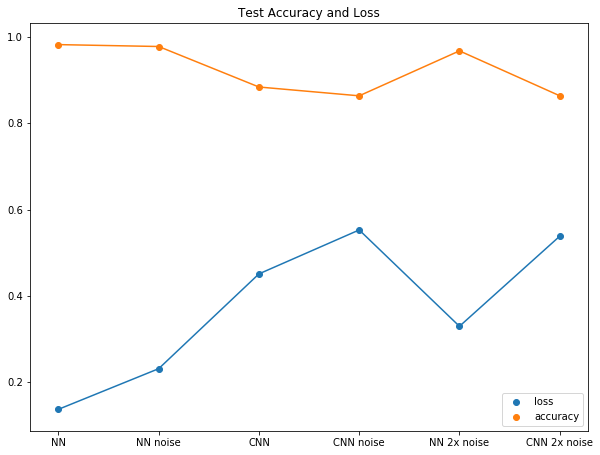

In [37]:
plt.plot(NN_results_test.model, NN_results_test.loss)
plt.plot(NN_results_test.model, NN_results_test.accuracy)

plt.legend((plt.scatter(NN_results_test.model, NN_results_test.loss), 
            plt.scatter(NN_results_test.model, NN_results_test.accuracy)), 
           ('loss', 'accuracy'), loc = 'lower right')
plt.title('Test Accuracy and Loss')
plt.show()


In [30]:
#train results

NN_results_train = pd.DataFrame([score_train, score1_train, score2_train, score3_train, score4_train, score5_train], 
                                columns = ("loss", "accuracy"))
NN_results_train['model'] = ('NN', 'NN noise', 'CNN', 'CNN noise', 'NN 2x noise', 'CNN 2x noise')
NN_results_train[['model', 'loss', 'accuracy']]

,model,loss,accuracy
0,NN,0.002587,0.999067
1,NN noise,0.000520,0.999767
2,CNN,0.470807,0.874917
3,CNN noise,0.572884,0.855283
4,NN 2x noise,0.001146,0.999633
5,CNN 2x noise,0.559058,0.854950


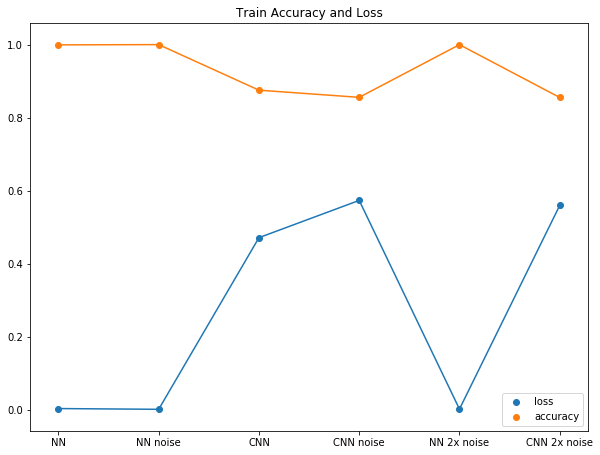

In [36]:
plt.plot(NN_results_train.model, NN_results_train.loss)
plt.plot(NN_results_train.model, NN_results_train.accuracy)

plt.legend((plt.scatter(NN_results_train.model, NN_results_train.loss), 
            plt.scatter(NN_results_train.model, NN_results_train.accuracy)), 
           ('loss', 'accuracy'), loc = 'lower right')
plt.title('Train Accuracy and Loss')
plt.show()


# Neural Networks - Image Recognition 

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [ ]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])